In [1]:
import _heatmap
import kdel_traj_contact
from _heatmap import *
from kdel_traj_contact import _index_info
from kdel_traj_contact import *
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
font = {'size'   : 12}
matplotlib.rc('font', **font)
freq_threshold = 0.005
zone_threshold = 0.5
chain_id_pair = [1,0] # A: receptor, B: ligand ## the first item represents ligand, second is receptor
gap = False # there are gaps in G alpha


100%|██████████| 208/208 [00:03<00:00, 63.32it/s]


<Figure size 432x288 with 0 Axes>

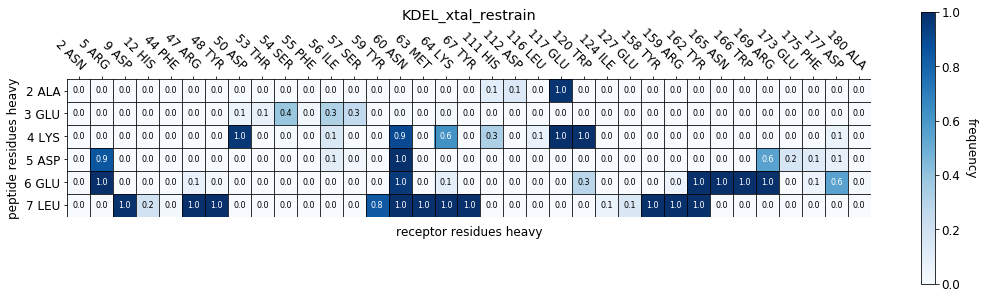

100%|██████████| 208/208 [00:03<00:00, 62.02it/s]


<Figure size 432x288 with 0 Axes>

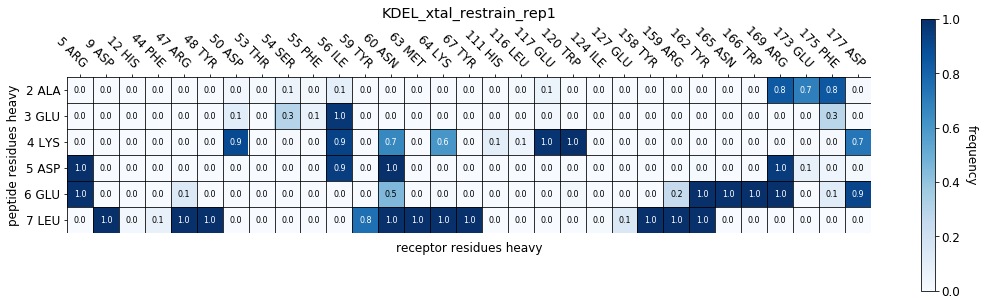

In [2]:
#system_names = ['human_6ddf.DAMGO.arrestin2_pose','human_6ddf.DAMGO.arrestin_pose','human_6ddf.DAMGO.xtal_pose']
system_names = ['KDEL_xtal_restrain','KDEL_xtal_restrain_rep1', 'KDEL_igslel_restrain','KDEL_igslel_restrain_rep1', 'KDEL_ihspdl_restrain','KDEL_ihspdl_restrain_rep1']#'KDEL_igslel_restrain',

for x in [0,1]:
    s_name = system_names[x]
    reference_pdb = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation',s_name,'output',s_name+'_Resi4.pdb')
    traj_dcd = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation',s_name,'output',s_name+'.dcd')
    chain_list,trajectory = load_traj_by_heavy(reference_pdb,traj_dcd)
    r_rec_index, rec_start_i, rec_end_i,r_oth_index,oth_start_index,oth_end_index = _index_info(chain_list,chain_id_pair)
    #print (trajectory)
    #print (r_oth_index,'r_oth_index')
    #print (oth_start_index,'oth_start_index')
    #print (oth_end_index, 'oth_end_index')
    #print (r_rec_index,'r_rec_index')
    #print (rec_start_i,'rec_start_i')
    #print (rec_end_i,'rec_end_i')
    heavy_dist_matrix, rec_indexes, oth_indexes = calc_frequency_matrix(chain_list,trajectory, chain_id_pair, zone_threshold,freq_threshold, gap)
    receptor_residues_labels,receptor_TMs_labels,other_chain_residues_labels = convert_Indexes2Labels(chain_list, chain_id_pair,rec_indexes,r_rec_index,rec_start_i,oth_indexes, r_oth_index, oth_start_index, gap)
    #print (other_chain_residues_labels)
    new_matrix =np.zeros((heavy_dist_matrix.shape[1], heavy_dist_matrix.shape[0]))
    for i in range(heavy_dist_matrix.shape[1]):
        for j in range(heavy_dist_matrix.shape[0]):
            new_matrix[i][j]=heavy_dist_matrix[j][i]
            
    plt.clf()
    fig, ax = plt.subplots(figsize=(18,5))
    #im,cbar = heatmap(heavy_dist_matrix, [receptor_TMs_labels[r] for r in range(len(receptor_TMs_labels))], [other_chain_residues_labels[o] for o in range(len(other_chain_residues_labels))], ax=ax,cmap="Blues", cbarlabel="frequency")
    im,cbar = heatmap(new_matrix,[other_chain_residues_labels[o] for o in range(len(other_chain_residues_labels))], [receptor_TMs_labels[r] for r in range(len(receptor_TMs_labels))],ax=ax,cmap="Blues", cbarlabel="frequency")
    texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
    ax.set_title(s_name)
    plt.xlabel('receptor residues heavy')
    plt.ylabel('peptide residues heavy')
    plt.savefig('contact_residues_'+s_name+'.png')
    plt.show()


 10%|▉         | 4/41 [00:00<00:01, 34.67it/s]

<mdtraj.Trajectory with 500 frames, 1751 atoms, 214 residues, and unitcells>


100%|██████████| 41/41 [00:00<00:00, 57.16it/s]


<Figure size 432x288 with 0 Axes>

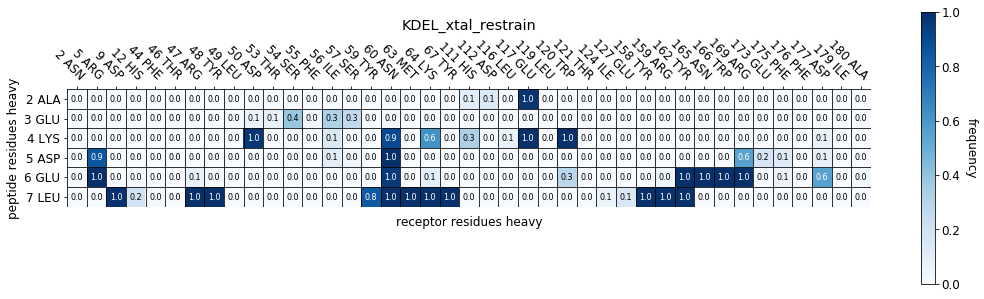

 10%|▉         | 4/41 [00:00<00:01, 34.25it/s]

<mdtraj.Trajectory with 500 frames, 1751 atoms, 214 residues, and unitcells>


100%|██████████| 41/41 [00:00<00:00, 53.80it/s]


<Figure size 432x288 with 0 Axes>

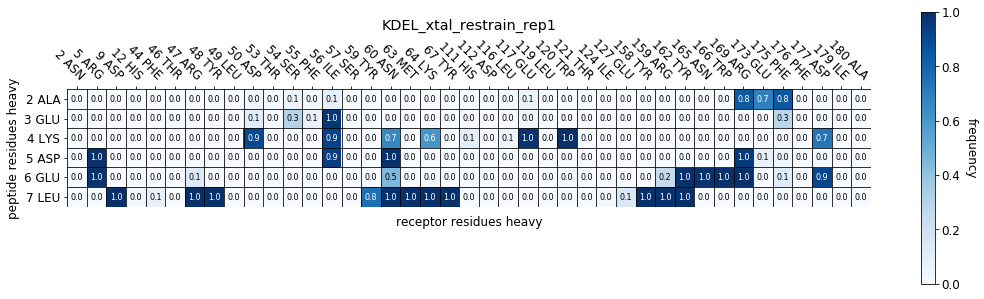

In [3]:
for x in [0,1]:
    s_name = system_names[x]
    reference_pdb = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation',s_name,'output',s_name+'_Resi4.pdb')
    traj_dcd = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation',s_name,'output',s_name+'.dcd')
    chain_list,trajectory = load_traj_by_heavy(reference_pdb,traj_dcd)
    r_rec_index, rec_start_i, rec_end_i,r_oth_index,oth_start_index,oth_end_index = _index_info(chain_list,chain_id_pair)
    print (trajectory)
    fixed_other_chains_indexes = [208,209,210,211,212,213]
    fixed_receptor_indexes = [1, 4, 8, 11, 43, 46, 47, 49, 52, 53, 54, 55, 56, 58, 59, 62, 63, 66, 110, 111, 115, 116, 119, 123, 126, 157, 158, 161, 164, 165, 168, 172, 174, 176, 179, 45, 48, 118, 120, 175, 178, 45, 48, 118, 120, 175, 178]
    fixed_receptor_indexes = sorted(list(set(fixed_receptor_indexes)))
    #print (fixed_receptor_indexes)
    heavy_dist_matrix,rec_indexes, pep_indexes = calc_freq_matrix_fixed_indexes(chain_list,trajectory, chain_id_pair, fixed_receptor_indexes, fixed_other_chains_indexes, zone_threshold,freq_threshold, gap)
    #print (rec_indexes)
    receptor_residues_labels,receptor_TMs_labels,other_chain_residues_labels = convert_Indexes2Labels(chain_list, chain_id_pair,fixed_receptor_indexes,r_rec_index,rec_start_i,fixed_other_chains_indexes, r_oth_index, oth_start_index, gap)
    #print (receptor_TMs_labels)
    plt.clf()
    fig, ax = plt.subplots(figsize=(18,5))
    new_matrix =np.zeros((heavy_dist_matrix.shape[1], heavy_dist_matrix.shape[0]))
    for i in range(heavy_dist_matrix.shape[1]):
        for j in range(heavy_dist_matrix.shape[0]):
            new_matrix[i][j]=heavy_dist_matrix[j][i]
    #im,cbar = heatmap(new_matrix, [receptor_TMs_labels[r] for r in range(len(receptor_TMs_labels))], [other_chain_residues_labels[o] for o in range(len(other_chain_residues_labels))], ax=ax,cmap="Blues", cbarlabel="frequency")
    im,cbar = heatmap(new_matrix,[other_chain_residues_labels[o] for o in range(len(other_chain_residues_labels))], [receptor_TMs_labels[r] for r in range(len(receptor_TMs_labels))],ax=ax,cmap="Blues", cbarlabel="frequency")
    texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
    ax.set_title(s_name)
    plt.xlabel('receptor residues heavy')
    plt.ylabel('peptide residues heavy')
    plt.savefig('contact_residues_'+system_names[0]+'.png')
    plt.show()
 

None
KDEL_igslel_restrain
Starting residue index is 1
There are 2 chains in this system.


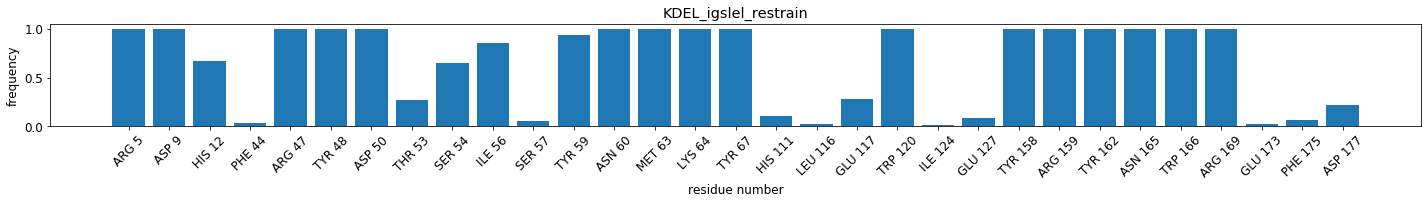

None
KDEL_igslel_restrain_rep1
Starting residue index is 1
There are 2 chains in this system.


<Figure size 432x288 with 0 Axes>

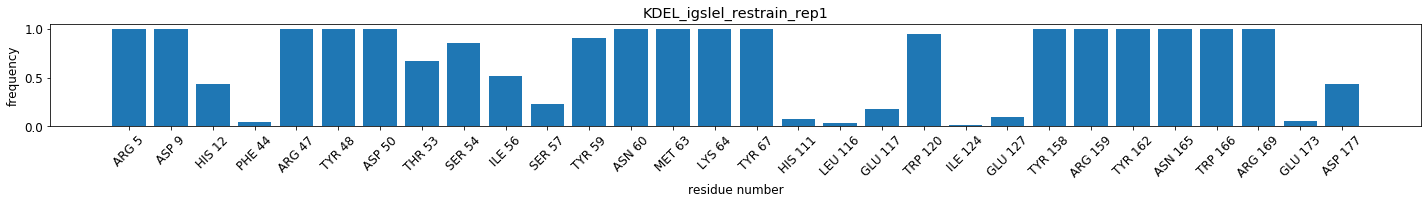

None
Starting residue index is 1
There are 2 chains in this system.


<Figure size 432x288 with 0 Axes>

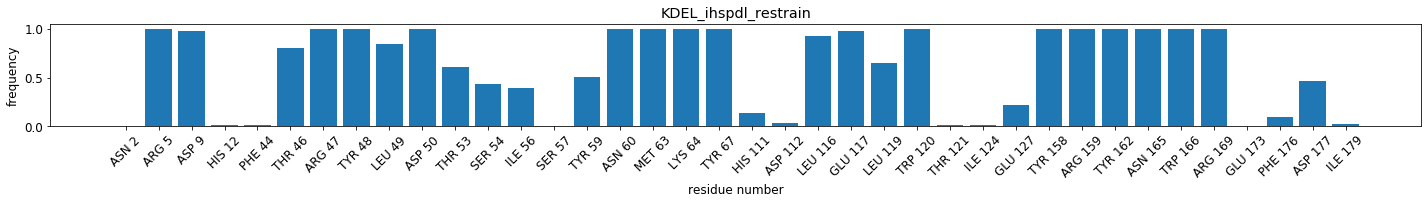

None
Starting residue index is 1
There are 2 chains in this system.


<Figure size 432x288 with 0 Axes>

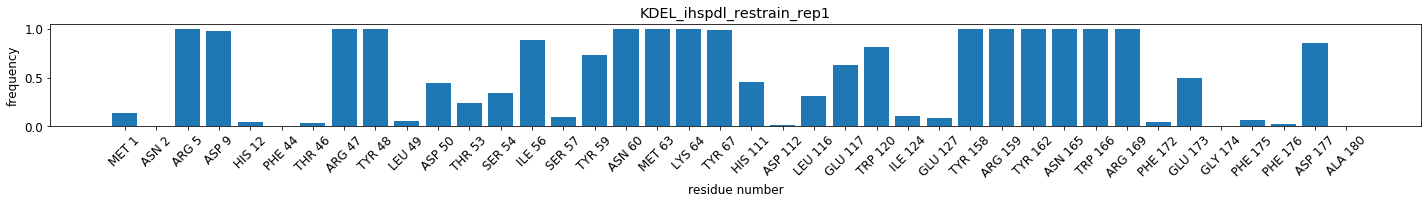

<Figure size 432x288 with 0 Axes>

In [4]:
for i in range(2,6):
    s_name = system_names[i]
    reference_pdb = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation',s_name,'output',s_name+'.pdb')
    traj_dcd = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation',s_name,'output',s_name+'.dcd')
    fixed_list = None
    print (fixed_list)
    if 'ig' in s_name:
        ligtop=True
        print (s_name)
    else:
        ligtop=False
    #print (ligtop)
    connect = cal_freq_binding_site(ligtop, reference_pdb, traj_dcd,fixed_list, zone_threshold, frequency_threshold)
    plt.figure(figsize=(20,3))
    plt.title(s_name)
    vals = []
    tem = {}
    for key in connect.keys():
        tem[int(key.split()[1])] = key.split()[0]
    sorted_tem = sorted(tem)
    keys = [tem[s]+' '+str(s) for s in sorted_tem]
    for key in keys:
        vals.append(connect[key])
    plt.bar(range(len(vals)), vals)
    plt.xticks(range(len(keys)),[x for x in keys],rotation=45)
    plt.xlabel('residue number')
    plt.ylabel('frequency')
    plt.savefig('contact_residues_'+s_name+'.png')
    plt.tight_layout()
    plt.show()
    plt.clf()


In [5]:
s_name

'KDEL_ihspdl_restrain_rep1'

Starting residue index is 1
There are 3 chains in this system.
use  fixed_list


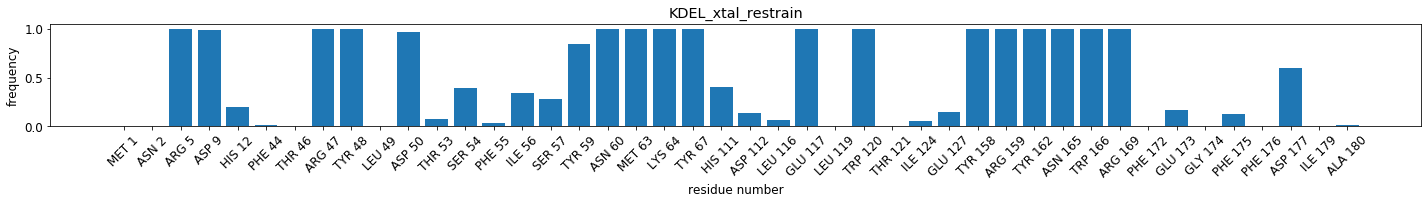

Starting residue index is 1
There are 3 chains in this system.
use  fixed_list


<Figure size 432x288 with 0 Axes>

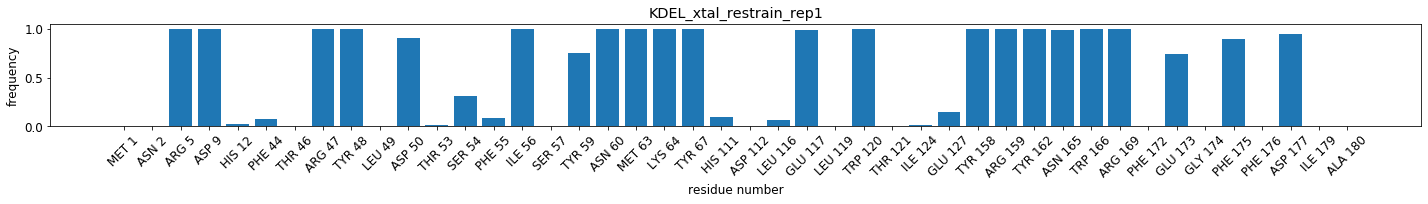

Starting residue index is 1
There are 2 chains in this system.
use  fixed_list


<Figure size 432x288 with 0 Axes>

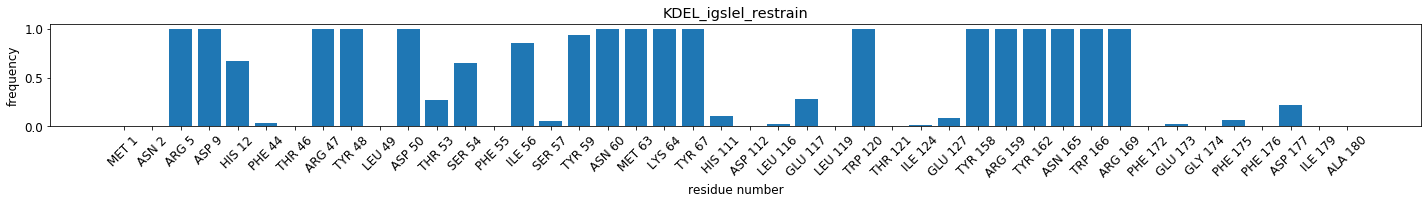

Starting residue index is 1
There are 2 chains in this system.
use  fixed_list


<Figure size 432x288 with 0 Axes>

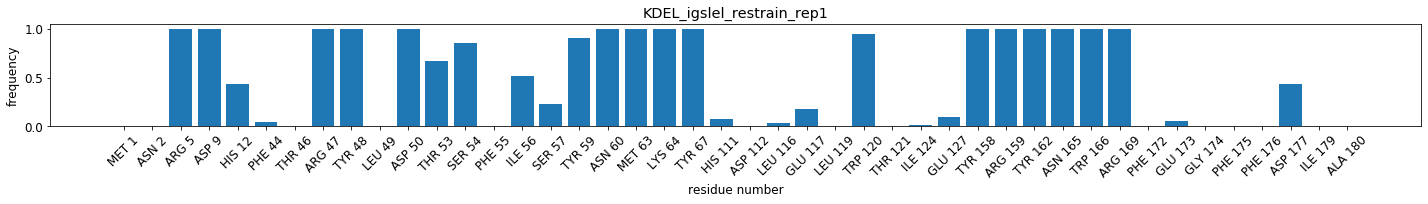

Starting residue index is 1
There are 2 chains in this system.
use  fixed_list


<Figure size 432x288 with 0 Axes>

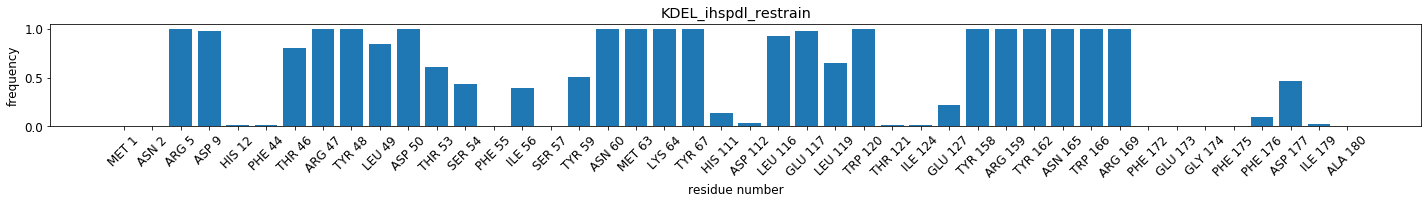

Starting residue index is 1
There are 2 chains in this system.
use  fixed_list


<Figure size 432x288 with 0 Axes>

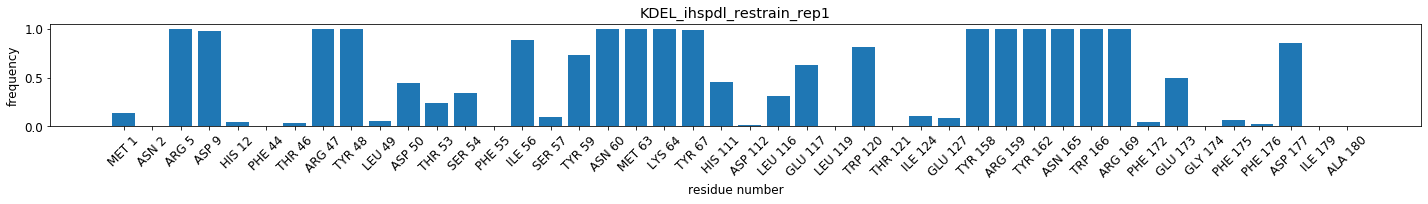

<Figure size 432x288 with 0 Axes>

In [6]:
#system_names = ['KDEL_xtal_restrain', 'KDEL_igslel_restrain', 'KDEL_ihspdl_restrain']#'KDEL_igslel_restrain',
zone_threshold = 0.5
frequency_threshold=0.005
total_connect = {}

for i in range(6):
    s_name = system_names[i]
    reference_pdb = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation',s_name,'output',s_name+'.pdb')
    traj_dcd = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation',s_name,'output',s_name+'.dcd')
    fixed_list = [0,1, 4, 8, 11, 43, 46, 47, 49, 52, 53, 54, 55, 56, 58, 59, 62, 63, 66, 110, 111, 115, 116, 118, 119, 120, 123, 126, 157, 158, 161, 164, 165, 168, 171, 172, 173, 174, 175, 176, 179, 45, 48, 118, 120, 178]
    fixed_list = sorted(list(set(fixed_list)))
    if 'ig' in s_name :
        connect = cal_freq_binding_site(True, reference_pdb, traj_dcd,fixed_list, zone_threshold, frequency_threshold)
    elif 'ih' in s_name:
        connect = cal_freq_binding_site(False, reference_pdb, traj_dcd,fixed_list, zone_threshold, frequency_threshold)
    elif 'xtal' in s_name:
        connect = cal_freq_binding_site_peptide(reference_pdb, traj_dcd,fixed_list, zone_threshold, frequency_threshold)
    else:
        print ('Unrecognized system name.')
    total_connect[s_name]=connect
    plt.figure(figsize=(20,3))
    plt.title(s_name)
    vals = []
    tem = {}
    for key in connect.keys():
        tem[int(key.split()[1])] = key.split()[0]
    sorted_tem = sorted(tem)
    keys = [tem[s]+' '+str(s) for s in sorted_tem]
    for key in keys:
        vals.append(connect[key])
    plt.bar(range(len(vals)), vals)
    plt.xticks(range(len(keys)),[x for x in keys],rotation=45)
    plt.xlabel('residue number')
    plt.ylabel('frequency')
    plt.tight_layout()
    plt.savefig('contact_residues_'+s_name+'.png')
    plt.show()
    plt.clf()

In [7]:
target_dic = total_connect['KDEL_xtal_restrain']
ig = total_connect['KDEL_igslel_restrain']
ih = total_connect['KDEL_ihspdl_restrain']
diff_ig = {}
diff_ih = {}
for_table_list = [] # order is: key, KDEL_xtal_restrain_value,ig_value,ih_value, ig_diff, ih_diff
for_table_list.append(['Residues','AEKDEL cont freq','IGSLEL cont freq', 'IHSPDL cont freq','AEKDEL-IGSLEL','AEKDEL-IHSPDL'])
for key in target_dic.keys():
    diff_ig[key] = round(target_dic[key] - ig[key],2)
    diff_ih[key] = round(target_dic[key] - ih[key],2)
    for_table_list.append([key,round(target_dic[key],2),round(ig[key],2), round(ih[key],2), diff_ig[key], diff_ih[key]])
print (diff_ig)

{'MET 1': 0.0, 'ASN 2': 0.01, 'ARG 5': 0.0, 'ASP 9': -0.01, 'HIS 12': -0.47, 'PHE 44': -0.02, 'THR 46': 0.0, 'ARG 47': 0.0, 'TYR 48': 0.0, 'LEU 49': 0.0, 'ASP 50': -0.03, 'THR 53': -0.19, 'SER 54': -0.26, 'PHE 55': 0.03, 'ILE 56': -0.51, 'SER 57': 0.22, 'TYR 59': -0.09, 'ASN 60': 0.0, 'MET 63': 0.0, 'LYS 64': 0.0, 'TYR 67': 0.0, 'HIS 111': 0.29, 'ASP 112': 0.14, 'LEU 116': 0.05, 'GLU 117': 0.72, 'LEU 119': 0.0, 'TRP 120': 0.0, 'THR 121': 0.0, 'ILE 124': 0.04, 'GLU 127': 0.06, 'TYR 158': 0.0, 'ARG 159': 0.0, 'TYR 162': 0.0, 'ASN 165': 0.0, 'TRP 166': 0.0, 'ARG 169': 0.0, 'PHE 172': 0.0, 'GLU 173': 0.13, 'GLY 174': 0.0, 'PHE 175': 0.06, 'PHE 176': 0.0, 'ASP 177': 0.38, 'ILE 179': 0.0, 'ALA 180': 0.01}


In [8]:
from IPython.display import HTML, display
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in for_table_list)
       )
))


Residues,AEKDEL cont freq,IGSLEL cont freq,IHSPDL cont freq,AEKDEL-IGSLEL,AEKDEL-IHSPDL
MET 1,0.0,0.0,0.0,0.0,0.0
ASN 2,0.01,0.0,0.01,0.01,0.0
ARG 5,1.0,1.0,1.0,0.0,0.0
ASP 9,0.99,1.0,0.97,-0.01,0.02
HIS 12,0.19,0.67,0.01,-0.47,0.18
PHE 44,0.02,0.03,0.02,-0.02,-0.0
THR 46,0.0,0.0,0.8,0.0,-0.8
ARG 47,1.0,1.0,1.0,0.0,0.0
TYR 48,1.0,1.0,1.0,0.0,0.0
LEU 49,0.0,0.0,0.84,0.0,-0.84


In [9]:
target_dic = total_connect['KDEL_xtal_restrain_rep1']
ig = total_connect['KDEL_igslel_restrain_rep1']
ih = total_connect['KDEL_ihspdl_restrain_rep1']
diff_ig = {}
diff_ih = {}
for_table_list = [] # order is: key, KDEL_xtal_restrain_value,ig_value,ih_value, ig_diff, ih_diff
for_table_list.append(['Residues','AEKDEL cont freq','IGSLEL cont freq', 'IHSPDL cont freq','AEKDEL-IGSLEL','AEKDEL-IHSPDL'])
for key in target_dic.keys():
    diff_ig[key] = round(target_dic[key] - ig[key],2)
    diff_ih[key] = round(target_dic[key] - ih[key],2)
    for_table_list.append([key,round(target_dic[key],2),round(ig[key],2), round(ih[key],2), diff_ig[key], diff_ih[key]])


In [11]:
from IPython.display import HTML, display
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in for_table_list)
       )
))

Residues,AEKDEL cont freq,IGSLEL cont freq,IHSPDL cont freq,AEKDEL-IGSLEL,AEKDEL-IHSPDL
MET 1,0.0,0.0,0.14,0.0,-0.14
ASN 2,0.0,0.0,0.01,-0.0,-0.01
ARG 5,1.0,1.0,1.0,0.0,0.0
ASP 9,1.0,1.0,0.97,0.0,0.03
HIS 12,0.03,0.44,0.05,-0.41,-0.02
PHE 44,0.07,0.05,0.01,0.03,0.06
THR 46,0.0,0.0,0.04,0.0,-0.04
ARG 47,1.0,1.0,1.0,0.0,0.0
TYR 48,1.0,1.0,1.0,0.0,0.0
LEU 49,0.0,0.0,0.05,0.0,-0.05
